In [1]:
import pandas as pd
df = pd.read_csv("/Users/arijitghosh/Documents/AppyBootcamp/Project_three/Cancer_Cartographers/Source_Data/All_Cancer_Rates_US_Counties_2017-2021.csv")
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   County                                                        3168 non-null   object 
 1   FIPS                                                          3144 non-null   float64
 2   2023 Rural-Urban Continuum Codes([rural urban note])          3143 non-null   object 
 3   Age-Adjusted Incidence Rate([rate note]) - cases per 100,000  3144 non-null   object 
 4   Lower 95% Confidence Interval                                 3144 non-null   object 
 5   Upper 95% Confidence Interval                                 3144 non-null   object 
 6   CI*Rank([rank note])                                          3144 non-null   object 
 7   Lower CI (CI*Rank)                                            3144 no

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0.0,NaN,444.4,444.1,444.7,N/A,N/A,N/A,1744459,falling,-0.5,-0.7,-0.3
1,"Union County, Florida(6)",12125.0,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
2,"Traverse County, Minnesota(6)",27155.0,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
3,"Polk County, Texas(7)",48373.0,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
4,"Galax City, Virginia(6)",51640.0,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4


In [2]:
df_cleaned = df.dropna()
df_cleaned.head()

,County,FIPS,2023 Rural-Urban Continuum Codes([rural urban note]),"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
1,"Union County, Florida(6)",12125.0,Rural,1248.4,1177.5,1322.7,N/A,N/A,N/A,245,stable,0.4,-0.6,1.5
2,"Traverse County, Minnesota(6)",27155.0,Rural,693.5,588.2,814.3,N/A,N/A,N/A,37,stable,2.2,-0.9,5.5
3,"Polk County, Texas(7)",48373.0,Rural,679.5,648.4,711.8,N/A,N/A,N/A,436,stable,-0.3,-3.1,2.5
4,"Galax City, Virginia(6)",51640.0,Rural,655,577.7,740.2,N/A,N/A,N/A,55,stable,1.7,-0.7,4
5,"Greeley County, Nebraska(6)",31077.0,Rural,653.1,519.4,812.5,N/A,N/A,N/A,21,stable,0.7,-2.3,3.6


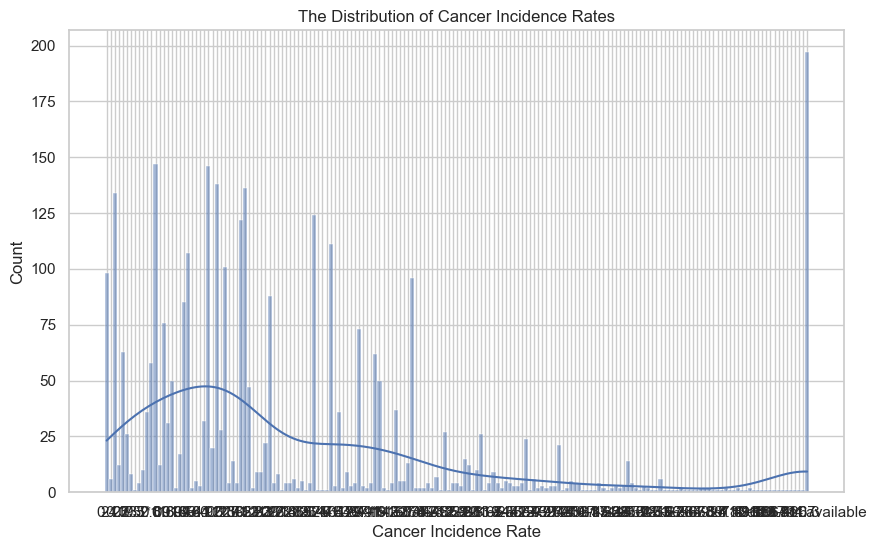

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize =(10,6))
sns.histplot(df_cleaned["Recent 5-Year Trend ([trend note]) in Incidence Rates"], bins=30, kde = True)
plt.title("The Distribution of Cancer Incidence Rates")
plt.xlabel("Cancer Incidence Rate")
plt.ylabel("Count")
plt.show()


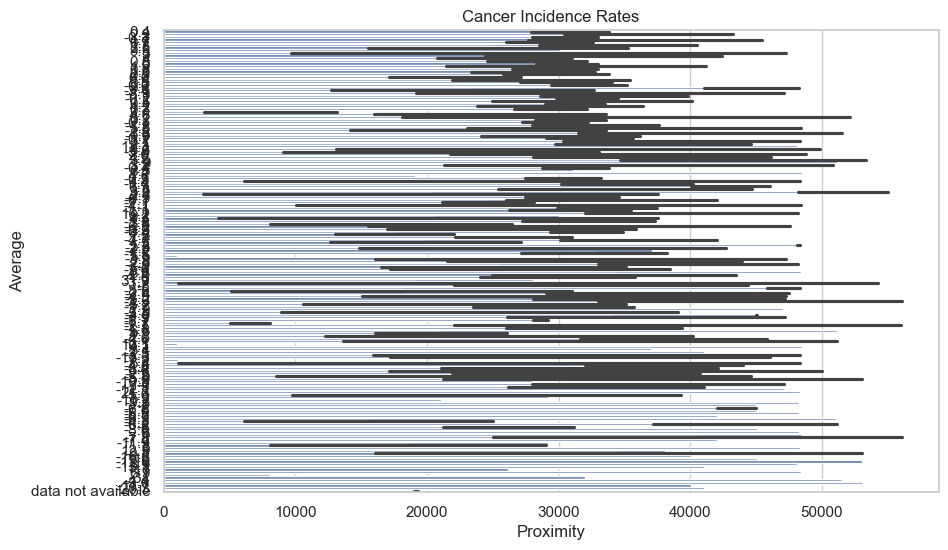

In [5]:
plt.figure(figsize =(10,6))
sns.barplot(x='FIPS', y='Recent 5-Year Trend ([trend note]) in Incidence Rates', data=df_cleaned)  #debug
plt.title("Cancer Incidence Rates")
plt.xlabel("Proximity")
plt.ylabel("Average")
plt.show()

In [9]:
Heatmap_data = df_cleaned.pivot_table(index="County", columns= "FIPS",values="Recent 5-Year Trend ([trend note]) in Incidence Rates", aggfunc=)

plt.figure(figsize =(12,8))
sns.heatmap(Heatmap_data, annot=True, cmap="coolwarm", fmt=".1f")  
plt.title("Average Cancer Incidence Rates")
plt.xlabel("Proximity")
plt.ylabel("County")
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

In [11]:
# Create the pivot table
Heatmap_data = df_cleaned.pivot_table(
    index="County", 
    columns="FIPS", 
    values="Recent 5-Year Trend ([trend note]) in Incidence Rates", 
    aggfunc='mean'  # Use 'mean' to aggregate data
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Heatmap_data, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Average Cancer Incidence Rates by County and FIPS Code")
plt.xlabel("FIPS Code")
plt.ylabel("County")
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [4]:
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
folium.Choropleth(geo_data=geojson_url,
 name='choropleth', 
 data=df, 
 columns=['FIPS', 'Incidence_Rate'], 
 key_on='feature.id', # Feature.id for FIPS matching 
 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, legend_name='Age-Adjusted Incidence Rate (per 100,000)', ).add_to(usa_map)




In [6]:
Marker_cluster = MarkerCluster().add_to(usa_map)

for index, row in All_cancer.iterrows():
    folium.Marker(
        location = [row["county"], row["fips"]],
        popup = f"Plant: {row['Plant_Name']}\nState: {row['State']}",
        icon = folium.Icon(color="red", icon="info-sign")
    ).add_to(Marker_cluster)

usa_map



KeyError: 'county'